In [59]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [60]:
data= pd.read_csv("G:/NLP Project/Whatsapp_new.csv")

In [61]:
data

,Date,Comments,Group_Name
0,2/24/2022 11:51,<Media omitted>,football
1,2/24/2022 11:54,<Media omitted>,football
2,2/24/2022 12:18,"Wueh, Putin😂🙌🏾",football
3,2/24/2022 12:20,"Experts, hii kitu ita affe t aje Africa?",football
4,2/24/2022 12:22,"Ni Kenya tu, hii kiherehere yenu lazima aizime😂😂",football
...,...,...,...
10467,NaN,Courage ya kuomba kura to some people hata nas...,Politics
10468,NaN,Court is changing the tune let's pray hard thi...,Politics
10469,NaN,"Court will decide, as they have indicated",Politics
10470,NaN,Cow shade,Politics


In [62]:
data.tail()

,Date,Comments,Group_Name
10467,NaN,Courage ya kuomba kura to some people hata nas...,Politics
10468,NaN,Court is changing the tune let's pray hard thi...,Politics
10469,NaN,"Court will decide, as they have indicated",Politics
10470,NaN,Cow shade,Politics
10471,NaN,Coward fuliza boy huyo,Politics


In [63]:
data= data.drop(['Date'], axis=1)
data

,Comments,Group_Name
0,<Media omitted>,football
1,<Media omitted>,football
2,"Wueh, Putin😂🙌🏾",football
3,"Experts, hii kitu ita affe t aje Africa?",football
4,"Ni Kenya tu, hii kiherehere yenu lazima aizime😂😂",football
...,...,...
10467,Courage ya kuomba kura to some people hata nas...,Politics
10468,Court is changing the tune let's pray hard thi...,Politics
10469,"Court will decide, as they have indicated",Politics
10470,Cow shade,Politics


In [64]:
data['Group_Name'].value_counts()

Politics    5341
football    5118
Name: Group_Name, dtype: int64

In [65]:
sentiment_label = data.Group_Name.factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Index(['football', 'Politics'], dtype='object'))

In [66]:
tweet = data.Comments.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [67]:
print(tokenizer.word_index)

{'the': 1, 'to': 2, 'na': 3, 'and': 4, 'ni': 5, 'is': 6, 'a': 7, 'you': 8, 'of': 9, 'in': 10, 'ya': 11, 'for': 12, 'i': 13, 'we': 14, 'he': 15, 'are': 16, 'will': 17, 'be': 18, 'that': 19, 'hii': 20, 'it': 21, 'so': 22, 'all': 23, 'not': 24, 'this': 25, 'kwa': 26, 'but': 27, 'on': 28, 'with': 29, 'your': 30, 'good': 31, 'sonko': 32, 'was': 33, 'hio': 34, 'have': 35, 'tu': 36, 'his': 37, 'si': 38, 'from': 39, 'as': 40, 'time': 41, 'team': 42, 'has': 43, 'sana': 44, 'they': 45, 'sasa': 46, 'people': 47, 'what': 48, 'wa': 49, 'who': 50, 'kama': 51, 'do': 52, 'man': 53, 'him': 54, 'bro': 55, 'wewe': 56, 'sawa': 57, 'haha': 58, 'best': 59, 'our': 60, 'one': 61, 'no': 62, 'season': 63, 'ndio': 64, 'ata': 65, 'ama': 66, 'at': 67, 'pia': 68, 'watu': 69, 'am': 70, 'or': 71, 'if': 72, 'players': 73, 'us': 74, 'lakini': 75, 'know': 76, 'can': 77, "don't": 78, 'ndo': 79, 'like': 80, 'kuna': 81, 'u': 82, 'mtu': 83, 'my': 84, 'them': 85, '😆': 86, '😂😂😂': 87, 'me': 88, 'how': 89, 'chelsea': 90, 'shoul

In [68]:
print(tweet[200])
print(encoded_docs[200])

Haha poch ako chini sana. Hana continental pro license ata na bila hio huwezi bishana na the big boys that have completed all their courses in understanding the game.
[58, 95, 428, 44, 434, 1558, 4114, 65, 3, 432, 34, 629, 4115, 3, 1, 239, 1393, 19, 35, 2442, 23, 101, 4116, 10, 1, 96]


In [69]:
print(padded_sequence[1000])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [70]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           514752    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 531,403
Trainable params: 531,403
Non-trainable params: 0
________________________________________________

In [71]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
262/262 [==============================] - 35s 121ms/step - loss: 0.5925 - accuracy: 0.6785 - val_loss: 0.6674 - val_accuracy: 0.7136
Epoch 2/5
262/262 [==============================] - 57s 217ms/step - loss: 0.3497 - accuracy: 0.8471 - val_loss: 0.6571 - val_accuracy: 0.6563
Epoch 3/5
262/262 [==============================] - 62s 236ms/step - loss: 0.2519 - accuracy: 0.8922 - val_loss: 0.6768 - val_accuracy: 0.6936
Epoch 4/5
262/262 [==============================] - 64s 245ms/step - loss: 0.2030 - accuracy: 0.9172 - val_loss: 0.7781 - val_accuracy: 0.7375
Epoch 5/5
262/262 [==============================] - 62s 236ms/step - loss: 0.1781 - accuracy: 0.9241 - val_loss: 0.8134 - val_accuracy: 0.7351


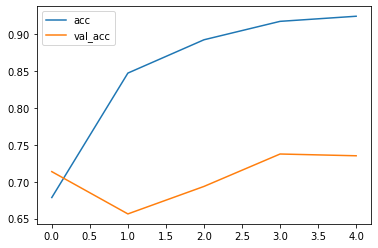

<Figure size 432x288 with 0 Axes>

In [72]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

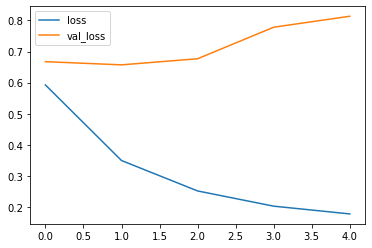

<Figure size 432x288 with 0 Axes>

In [73]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [74]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [75]:
test_sentence1 = "Tunataka team ziko serious buana."
predict_sentiment(test_sentence1)

test_sentence2 = "not a bad start, keep it up theophilus."
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 488ms/step
Predicted label:  football
1/1 [==============================] - 0s 55ms/step
Predicted label:  football
